In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definisikan Masalah terkait bisnis yang ingin anda selesaikan (Define Business Problem):
__Masalah terkait bisnis : Banyaknya nasabah yang melakukan penutupan rekening terutama di saat pandemi berlangsung__

sumber pendukung : https://www.merdeka.com/uang/lps-hanya-sanggup-selamatkan-nasabah-5-bank-jika-bangkrut-akibat-corona.html

# Definisikan Tujuan EDA anda (Define Goals), Goals harus memiliki Impact untuk perusahaan:
__Tujuan EDA : Menurunkan persentase nasabah yang melakukan penutupan rekening dan penentuan saran untuk meningkatkan daya minat masyarakat terhadap fasilitas bank__
__Goals EDA : Menurunkan persentase nasabah yang menutup rekening dari 20.37% menjadi 0.95%__

In [2]:
# Mengakses data
df = pd.read_csv('bank.csv', index_col=0)
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


# Analisa Deskriptif & Handling Missing Value serta Outliers

In [3]:
# Pengecekan tabel data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
# Pengecekan data kosong di tiap kolom
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# Analisa Deskriptif Data

dfDescribe = []
for i in df.columns:
    if (i == 'CreditScore') | (i == 'Age') | (i == 'Tenure') | (i == 'Balance') | (i == 'EstimatedSalary'):
        desc = df[i].drop_duplicates().sample(2).values
    else :
        desc = df[i].drop_duplicates().values
    
    dfDescribe.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / len(df)) * 100), 2),
        df[i].nunique(),
        desc
    ])
    
pd.DataFrame(dfDescribe, columns=[
    "Data Features",
    "Data Types",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,CustomerId,int64,0,0.0,10000,"[15634602, 15647311, 15619304, 15701354, 15737..."
1,Surname,object,0,0.0,2932,"[Hargrave, Hill, Onio, Boni, Mitchell, Chu, Ba..."
2,CreditScore,int64,0,0.0,460,"[780, 735]"
3,Geography,object,0,0.0,3,"[France, Spain, Germany]"
4,Gender,object,0,0.0,2,"[Female, Male]"
5,Age,int64,0,0.0,70,"[23, 45]"
6,Tenure,int64,0,0.0,11,"[9, 8]"
7,Balance,float64,0,0.0,6382,"[106074.89, 116358.0]"
8,NumOfProducts,int64,0,0.0,4,"[1, 3, 2, 4]"
9,HasCrCard,int64,0,0.0,2,"[1, 0]"


In [6]:
# Analisis Statistik Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [7]:
# Pengecekan Outliers
Desc_outliers = []
count = 0

for i in df[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]:
    Q1 = df.describe()[i]['25%']
    Q3 = df.describe()[i]['75%']
    IQR = Q3 - Q1
    upper_fence = Q3 + (1.5*IQR)
    lower_fence = Q1 - (1.5*IQR)
    
    for j in df[i]:
        if (j < lower_fence) | (j > upper_fence) :
            count+=1
    Desc_outliers.append([
        i,
        count
    ])

pd.DataFrame(Desc_outliers, columns=[
    "Data Features",
    "Jumlah Outliers"
])

,Data Features,Jumlah Outliers
0,CreditScore,15
1,Age,374
2,Tenure,374
3,Balance,374
4,EstimatedSalary,374


walau data memiliki nilai outliers, namun tidak dilakukan handling karena outliers merupakan nilai variatif yang tidak mengganggu pengolahan data

# Analisis Data (Univariate dan Multivariate, Gunakan Crosstab atau Pivot_Table atau Group by) dan Visualisasi Data (Univariate dan Multivariate, Gunakan plot sesuai dengan fungsi dan tujuannya)

# a. Analisis Univariate dan Visualisasi Data

In [8]:
# Analisis Univariate berdasarkan gender nasabah
Gender = pd.crosstab(df['Gender'], columns = ['Frekuensi'])
list_gender = []
for i in Gender['Frekuensi']:
    list_gender.append(
        (i/(Gender['Frekuensi'].sum()))*100)
Gender['Persentase (%)'] = list_gender
Gender = Gender.round(2)
Gender

col_0,Frekuensi,Persentase (%)
Gender,,
Female,4543,45.43
Male,5457,54.57


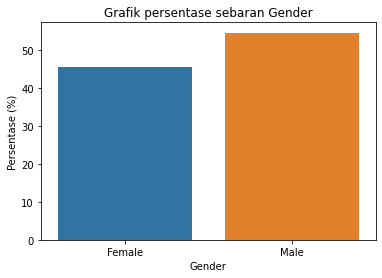

In [9]:
# Visualisasi data Analisis Univariate berdasarkan gender nasabah
plt.title("Grafik persentase sebaran Gender")
sns.barplot(x='Gender', y='Persentase (%)', data=Gender.reset_index())
plt.show()

Analisa ini untuk mengetahui dominasi nasabah berdasarkan gender

In [10]:
# Analisis Univariate berdasarkan jangka waktu kredit
Tenure = pd.crosstab(df['Tenure'], columns = ['Frekuensi'])
list_tenure = []
for i in Tenure['Frekuensi']:
    list_tenure.append(
        (i/(Tenure['Frekuensi'].sum()))*100)
Tenure['Persentase (%)'] = list_tenure
Tenure = Tenure.round(2)
Tenure

col_0,Frekuensi,Persentase (%)
Tenure,,
0,413,4.13
1,1035,10.35
2,1048,10.48
3,1009,10.09
4,989,9.89
5,1012,10.12
6,967,9.67
7,1028,10.28
8,1025,10.25


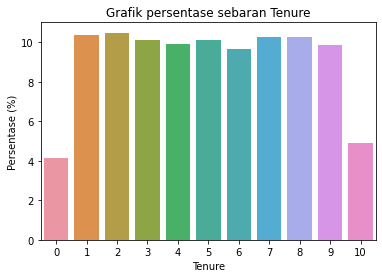

In [11]:
# Visualisasi data Analisis Univariate berdasarkan jangka waktu kredit
plt.title("Grafik persentase sebaran Tenure")
sns.barplot(x='Tenure', y='Persentase (%)', data=Tenure.reset_index())
plt.show()

Analisa ini untuk mengetahui pesebaran data jangka waktu peminjaman nasabah

In [12]:
# Analisis Univariate berdasarkan Wilayah
Geography = pd.crosstab(df['Geography'], columns = ['Frekuensi'])
list_geography = []
for i in Geography['Frekuensi']:
    list_geography.append(
        (i/(Geography['Frekuensi'].sum()))*100)
Geography['Persentase (%)'] = list_geography
Geography = Geography.round(2)
Geography

col_0,Frekuensi,Persentase (%)
Geography,,
France,5014,50.14
Germany,2509,25.09
Spain,2477,24.77


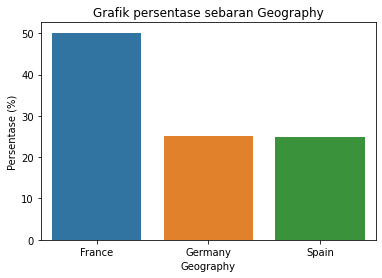

In [13]:
# Visualisasi data Analisis Univariate berdasarkan Wilayah
plt.title("Grafik persentase sebaran Geography")
sns.barplot(x='Geography', y='Persentase (%)', data=Geography.reset_index())
plt.show()

Analisa ini untuk mengetahui dominasi wilayah asal nasabah

In [14]:
# Analisis Univariate berdasarkan Nomor Layanan Produk
NumOfProducts = pd.crosstab(df['NumOfProducts'], columns = ['Frekuensi'])
list_nop = []
for i in NumOfProducts['Frekuensi']:
    list_nop.append(
        (i/(NumOfProducts['Frekuensi'].sum()))*100)
NumOfProducts['Persentase (%)'] = list_nop
NumOfProducts = NumOfProducts.round(2)
NumOfProducts

col_0,Frekuensi,Persentase (%)
NumOfProducts,,
1,5084,50.84
2,4590,45.90
3,266,2.66
4,60,0.60


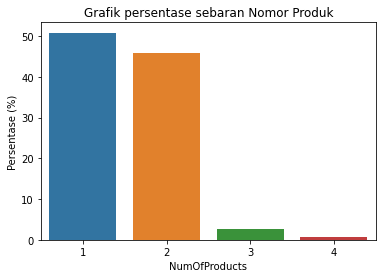

In [15]:
# Visualisasi data Analisis Univariate berdasarkan Nomor Layanan Produk
plt.title("Grafik persentase sebaran Nomor Produk")
sns.barplot(x='NumOfProducts', y='Persentase (%)', data=NumOfProducts.reset_index())
plt.show()

Analisa ini untuk mengetahui dominasi nasabah berdasarkan nomor layanan produk bank

In [16]:
# Analisis Univariate berdasarkan Kepemilikan Kartu Kredit
HasCrCard = pd.crosstab(df['HasCrCard'], columns = ['Frekuensi'])
list_hcc = []
for i in HasCrCard['Frekuensi']:
    list_hcc.append(
        (i/(HasCrCard['Frekuensi'].sum()))*100)
HasCrCard['Persentase (%)'] = list_hcc
HasCrCard = HasCrCard.round(2)
HasCrCard

col_0,Frekuensi,Persentase (%)
HasCrCard,,
0,2945,29.45
1,7055,70.55


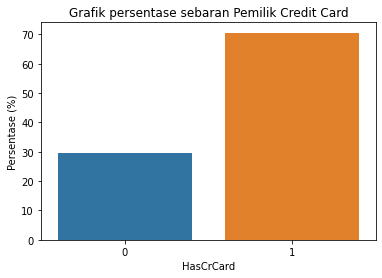

In [17]:
# Visualisasi data Analisis Univariate berdasarkan Kepemilikan Kartu Kredit
plt.title("Grafik persentase sebaran Pemilik Credit Card")
sns.barplot(x='HasCrCard', y='Persentase (%)', data=HasCrCard.reset_index())
plt.show()

Analisa ini untuk mengetahui dominasi nasabah berdasarkan kepemilikan kartu kredit. 1 merupakan Ya

In [18]:
# Analisis Univariate berdasarkan Keaktifan Nasabah
IsActiveMember = pd.crosstab(df['IsActiveMember'], columns = ['Frekuensi'])
list_iam = []
for i in IsActiveMember['Frekuensi']:
    list_iam.append(
        (i/(IsActiveMember['Frekuensi'].sum()))*100)
IsActiveMember['Persentase (%)'] = list_iam
IsActiveMember = IsActiveMember.round(2)
IsActiveMember

col_0,Frekuensi,Persentase (%)
IsActiveMember,,
0,4849,48.49
1,5151,51.51


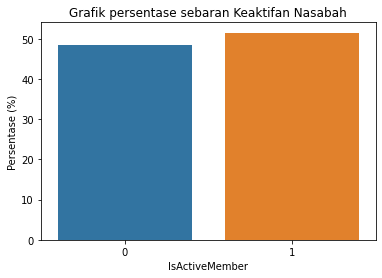

In [19]:
# Visualisasi data Analisis Univariate berdasarkan Keaktifan Nasabah
plt.title("Grafik persentase sebaran Keaktifan Nasabah")
sns.barplot(x='IsActiveMember', y='Persentase (%)', data=IsActiveMember.reset_index())
plt.show()

Analisa ini untuk mengetahui dominasi nasabah berdasarkan keaktifan nasabah sebagai anggota. 1 merupakan Ya

In [20]:
# Analisis Univariate berdasarkan Penutupan Rekening
Exited = pd.crosstab(df['Exited'], columns = ['Frekuensi'])
list_exited = []
for i in Exited['Frekuensi']:
    list_exited.append(
        (i/(Exited['Frekuensi'].sum()))*100)
Exited['Persentase (%)'] = list_exited
Exited = Exited.round(2)
Exited

col_0,Frekuensi,Persentase (%)
Exited,,
0,7963,79.63
1,2037,20.37


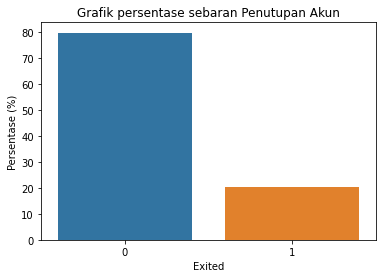

In [21]:
# Visualisasi data Analisis Univariate berdasarkan Penutupan Rekening
plt.title("Grafik persentase sebaran Penutupan Akun")
sns.barplot(x='Exited', y='Persentase (%)', data=Exited.reset_index())
plt.show()

Analisa ini untuk mengetahui dominasi nasabah berdasarkan penutupan rekening. 1 merupakan Ya. Karena nasabah yang menutup rekeningnya termasuk banyak (20.37%) maka analisis multivariate akan dilakukan berpatok pada data exited.

# b. Analisis Multivariate dan Visualisasi Data

In [22]:
# Analisis Multivariate antara Exited dan Gender
(pd.crosstab(index = df['Exited'], columns = df['Gender'], normalize = 'all')*100).round(2)

Gender,Female,Male
Exited,,
0,34.04,45.59
1,11.39,8.98


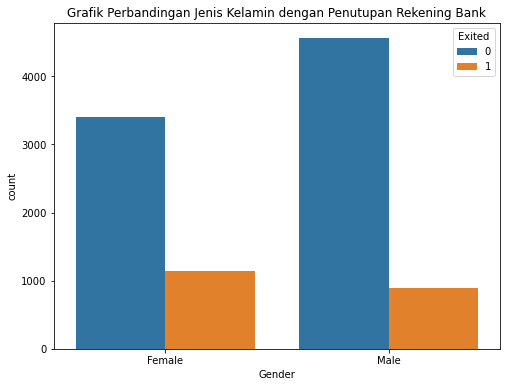

In [23]:
# Visualisasi data Analisis Multivariate antara Exited dan Gender
plt.figure(figsize = (8,6))
sns.countplot(x = 'Gender', data = df , hue = 'Exited')
plt.title('Grafik Perbandingan Jenis Kelamin dengan Penutupan Rekening Bank')
plt.show()

Dari hasil analisis multivariate gender nasabah terhadap penutupan rekening, ditarik kesimpulan bahwa gender nasabah tidak berpengaruh terhadap penutupan rekening.

In [24]:
# Analisis Multivariate antara Exited dan Jangka Waktu Kredit
(pd.crosstab(index = df['Exited'], columns = df['Tenure'], normalize = 'all')*100).round(2)

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
0,3.18,8.03,8.47,7.96,7.86,8.03,7.71,8.51,8.28,7.71,3.89
1,0.95,2.32,2.01,2.13,2.03,2.09,1.96,1.77,1.97,2.13,1.01


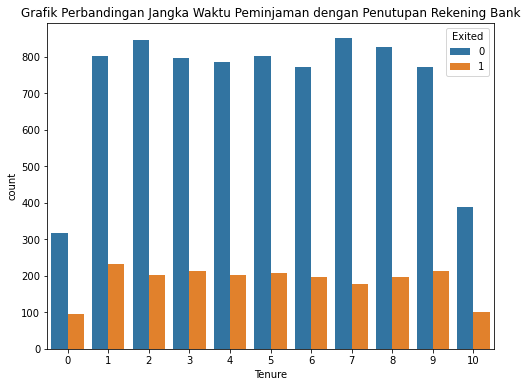

In [25]:
# Visualisasi data Analisis Multivariate antara Exited dan Jangka Waktu Kredit
plt.figure(figsize = (8,6))
sns.countplot(x = 'Tenure', data = df , hue = 'Exited')
plt.title('Grafik Perbandingan Jangka Waktu Peminjaman dengan Penutupan Rekening Bank')
plt.show()

Dari hasil analisis multivariate jangka waktu kredit nasabah terhadap penutupan rekening, ditarik kesimpulan bahwa fasilitas peminjaman dari bank untuk nasabah berpengaruh terhadap penutupan rekening. Kemungkinan selama melakukan kredit, nasabah tidak puas terhadap layanan dari bank.

In [26]:
# Analisis Multivariate antara Exited dan Wilayah
(pd.crosstab(index = df['Exited'], columns = df['Geography'], normalize = 'all')*100).round(2)

Geography,France,Germany,Spain
Exited,,,
0,42.04,16.95,20.64
1,8.10,8.14,4.13


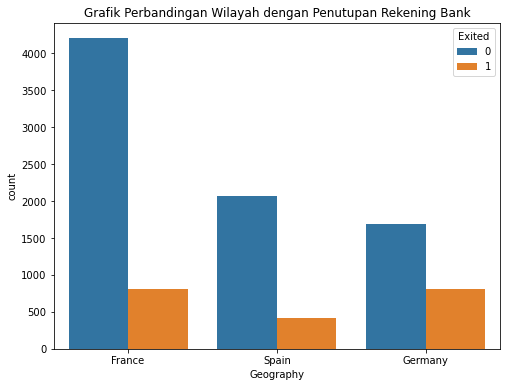

In [27]:
# Visualisasi data Analisis Multivariate antara Exited dan Wilayah
plt.figure(figsize = (8,6))
sns.countplot(x = 'Geography', data = df , hue = 'Exited')
plt.title('Grafik Perbandingan Wilayah dengan Penutupan Rekening Bank')
plt.show()

Dari hasil analisis multivariate asal wilayah nasabah terhadap penutupan rekening, ditarik kesimpulan bahwa asal daerah nasabah tidak berpengaruh terhadap keinginan nasaba untuk melakukan penutupan rekening.

In [28]:
# Analisis Multivariate antara Exited dan Nomor Layanan Produk dengan perbandingan persentase secara keseluruhan
(pd.crosstab(index = df['Exited'], columns = df['NumOfProducts'], normalize = 'all')*100).round(2)

NumOfProducts,1,2,3,4
Exited,,,,
0,36.75,42.42,0.46,0.0
1,14.09,3.48,2.20,0.6


In [29]:
# Analisis Multivariate antara Exited dan Nomor Layanan Produk dengan perbandingan antar kolom
(pd.crosstab(index = df['Exited'], columns = df['NumOfProducts'], normalize = 'columns')*100).round(2)

NumOfProducts,1,2,3,4
Exited,,,,
0,72.29,92.42,17.29,0.0
1,27.71,7.58,82.71,100.0


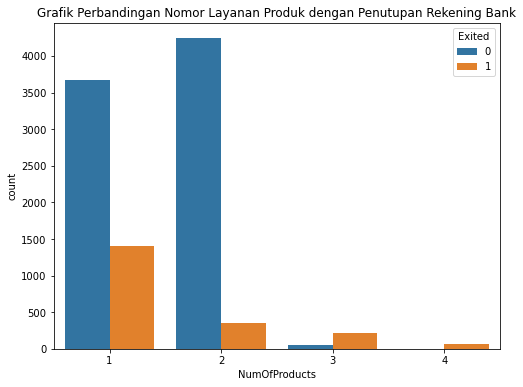

In [30]:
# Visualisasi data Analisis Multivariate antara Exited dan Nomor Layanan Produk
plt.figure(figsize = (8,6))
sns.countplot(x = 'NumOfProducts', data = df , hue = 'Exited')
plt.title('Grafik Perbandingan Nomor Layanan Produk dengan Penutupan Rekening Bank')
plt.show()

Dari hasil analisis multivariate nomor layanan produk bank terhadap penutupan rekening, ditarik kesimpulan bahwa untuk nomor produk 4 semua nasabah melakukan penutupan rekening. Nomor 3 sebanyak 82.71% nasabahnya menutup rekening. Dilanjut dengan nomor 1 dan 2 yang nasabahnya cukup banyak melakukan penutupan rekening.

In [31]:
# Analisis Multivariate antara Exited dan Kepemilikan Kartu Kredit
(pd.crosstab(index = df['Exited'], columns = df['HasCrCard'], normalize = 'all')*100).round(2)

HasCrCard,0,1
Exited,,
0,23.32,56.31
1,6.13,14.24


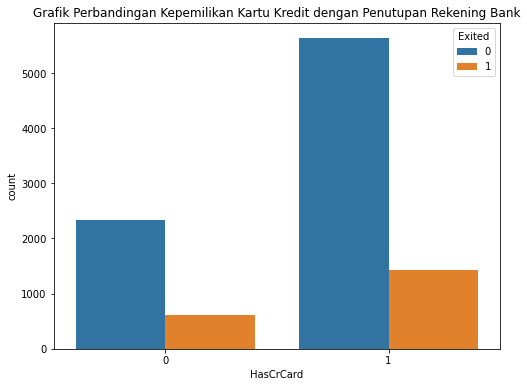

In [32]:
# Visualisasi data Analisis Multivariate antara Exited dan Kepemilikan Kartu Kredit
plt.figure(figsize = (8,6))
sns.countplot(x = 'HasCrCard', data = df , hue = 'Exited')
plt.title('Grafik Perbandingan Kepemilikan Kartu Kredit dengan Penutupan Rekening Bank')
plt.show()

Dari hasil analisis multivariate kepemilikan kartu kredit nasabah terhadap penutupan rekening, ditarik kesimpulan bahwa kepemilikan kartu kredit tidak berpengaruh terhadap penutupan rekening.

In [33]:
# Analisis Multivariate antara Exited dan Keaktifan Anggota (0 = tidak aktif, 1 = aktif)
(pd.crosstab(index = df['Exited'], columns = df['IsActiveMember'], normalize = 'all')*100).round(2)

IsActiveMember,0,1
Exited,,
0,35.47,44.16
1,13.02,7.35


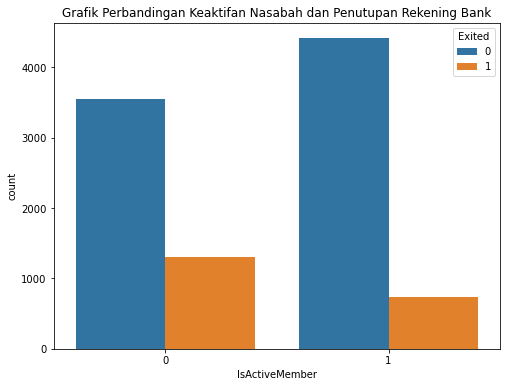

In [34]:
# Visualisasi data Analisis Multivariate antara Exited dan Keaktifan Anggota (0 = tidak aktif, 1 = aktif)
plt.figure(figsize = (8,6))
sns.countplot(x = 'IsActiveMember', data = df , hue = 'Exited')
plt.title('Grafik Perbandingan Keaktifan Nasabah dan Penutupan Rekening Bank')
plt.show()

Dari hasil analisis multivariate keaktifan anggota nasabah terhadap penutupan rekening, ditarik kesimpulan bahwa keaktifan anggota nasabah tidak berpengaruh terhadap penutupan rekening.

In [35]:
# Analisis Multivariate antara Jangka Waktu Peminjaman (dalam tahun) dan Nomor Layanan Produk
(pd.crosstab(index = df['Tenure'], columns = df['NumOfProducts'], normalize = 'columns')*100).round(2)

NumOfProducts,1,2,3,4
Tenure,,,,
0,4.64,3.73,2.26,0.00
1,11.17,9.39,12.03,6.67
2,9.30,11.83,7.89,18.33
3,10.41,9.37,15.79,13.33
4,9.91,10.07,7.52,5.00
5,9.85,10.20,13.53,11.67
6,9.64,9.93,6.39,6.67
7,10.17,10.50,9.02,8.33
8,10.33,10.20,10.53,6.67


Dari tabel diatas, saya ingin menghitung persentase nasabah tiap produk yang menggunakan fasilitas peminjaman dari bank ataupun tidak untuk perhitungan banyak nasabah

# Temukan Insight data berdasarkan Analisis dan Visualisasi yang telah anda lakukan

__Insight :__
1. Data bank ini tidak memiliki nilai kosong di semua kolomnya.
2. Data bank ini memiliki nilai outliers untuk kolom age (umur), tenure (jangka waktu peminjaman), balance (saldo), dan estimated salary (perkiraan gaji) namun tidak dilakukan handling karena nilai ini tidak berpengaruh terhadap EDA yang dilakukan.
3. Berdasarkan gender (jenis kelamin), nasabah bank didominasi oleh jenis kelamin laki-laki.
4. **Berdasarkan tenure (jangka waktu peminjaman), nasabah didominasi peminjaman berjangka 1-9 tahun dengan dominasi tertinggi dalam jangka waktu 2 tahun. Nasabah tanpa menggunakan fasilitas peminjaman bank sebesar 4.13%. Dapat disimpulkan bahwa mayoritas nasabah menggunakan fasilitas peminjaman dana dari bank.**
5. Berdasarkan pesebaran wilayah, Prancis mendominasi asal nasabah.
6. Berdasarkan sebaran nomor layanan produk, nasabah mendominasi nomor 1 dan 2.
7. Berdasarkan kepemilikan kartu kredit, mayoritas nasabah memiliki kartu kredit.
8. Berdasarkan status keaktifan, nasabah mendominasi status tidak aktif dengan beda yang tipis terhadap status tidak aktif.
9. **Berdasarkan data penutupan akun, ditemukan 20.37% nasabah melakukan penutupan rekening. Nilai ini tergolong sangat besar dan dapat mengganggu kestabilan ekonomi bank karena mengurangi pendapatan bank.**
10. Berdasarkan analisis jenis kelamin terhadap penutupan rekening, nasabah yang melakukan penutupan rekening didominasi oleh jenis kelamin laki-laki.
11. Berdasarkan analisis jangka waktu peminjaman terhadap penutupan rekening, mayoritas nasabah tidak melakukan penutupan rekening. Walaupun demikian, penutupan rekening didominasi oleh nasabah dengan jangka waktu peminjaman 1 tahun.
12. Berdasarkan analisis wilayah terhadap penutupan rekening, nasabah yang melakukan penutupan rekening didominasi dari wilayah Jerman dengan selisih yang sedikit dari Prancis.
13. **Berdasarkan analisis nomor layanan produk terhadap penutupan rekening, seluruh nasabah dengan nomor layanan produk 4 melakukan penutupan rekening. Nasabah dengan nomor layanan produk 3, mayoritas (82.71%) melakukan penutupan rekening. Nasabah dengan nomor layanan produk 1 sebanyak 27.71% memilih untuk menutup rekening bank.**
14. Berdasarkan analisis kepemilikan kartu kredit terhadap penutupan rekening, mayoritas nasabah yang melakukan penutupan rekening memiliki kartu kredit.
15. Berdasarkan analisis keaktifan anggota terhadap penutupan rekening, mayoritas nasabah yang melakukan penutupan rekening merupakan nasabah dengan status keanggotaan tidak aktif.
16. **Berdasarkan analisis nomor layanan produk terhadap jangka waktu peminjaman:**
    - **Nasabah dengan nomor layanan produk 4, seluruhnya merupakan nasabah dengan kepentingan peminjaman.**
    - **Nasabah dengan nomor layanan 1, 2, dan 3 didominasi oleh nasabah dengan kepentingan peminjaman.**

# Kesimpulan dan Saran serta simulasi Impact untuk perusahaan yang dapat anda berikan berdasarkan hasil EDA anda

# Kesimpulan:
1. Dari hasil analisis dan insight yang telah dilakukan, permasalahan yang terjadi dalam bank ini mengerucut pada banyaknya nasabah yang melakukan penutupan rekening sehingga mengganggu kestabilan ekonomi dan pendapatan bank. Nasabah yang melakukan penutupan rekening ini didominasi oleh nasabah dengan keperluan peminjaman dari bank. Poin ini menjadi prioritas untuk menemukan saran untuk bank.
2. Seluruh nasabah dengan nomor layanan produk 4 merupakan nasabah dengan keperluan peminjaman melakukan penutupan rekening. Begitu pula nasabah dengan nomor layanan produk 1, 2, dan 3 didominasi oleh nasabah dengan keperluan peminjaman banyak yang melakukan penutupan rekening.
3. Perlu membuat fasilitas selain tabungan dan kredit yang bersifat menarik minat orang lain untuk menjadi nasabah 


# Saran:
1. Prioritas improvement yang perlu dilakukan bank adalah melakukan penurunan bunga peminjaman jika meneruskan sistem yang telah terbentuk sehingga bunga tidak lebih besar dari bunga bank saingan agar orang lain tertarik menjadi nasabah. Opsi lain yg dapat dilakukan oleh bank adalah membuat beberapa pilihan peminjaman yang dapat meringankan nasabah dan menarik minat orang lain seperti:
    - Kredit Tanpa Agunan (KTA) dimana peminjam tidak perlu menjamin apapun saat mengajukan pinjaman kepada pihak bank namun bunga tinggi disertai dengan plafon yang tinggi juga agar nasabah tertarik. Perlu dilakukan pengecekan dan validasi pendapatan nasabah sebelum approval pengajuan kredit dilakukan.
    - Kredit Usaha Rakyat (KUR) yaitu peminjaman yang diberikan khusus kepada nasabah yang memiliki usaha. Untuk peminjaman jenis ini pihak bank wajib melakukan survey kelayakan usaha dan menahan agunan dari nasabah.
    - Kredit Multiguna yaitu kredit pendanaan pembelian barang bergerak atau tidak bergerak seperti mobil untuk usaha atau pembelian ruko untuk kantor. Perbedaan kredit jenis ini dari KUR adalah kredit ini tidak terbatas hanya untuk usaha melainkan bisa juga untuk pembelian barang maupun aset. Nasabah harus memiliki usaha yang layak untuk didanai atau sejumlah jaminan yang bisa diagunkan kepada pihak bank.
    - Kredit investasi ditujukan khusus bagi pelaku usaha, namun jangka waktu pengembaliannya lebih lama (bisa mencapai 10 tahun). Plafon yang dipinjamkan juga lebih banyak dan berfungsi sebagai investasi usaha, seperti untuk menyewa toko, membeli kantor, dan sebagainya. Untuk kredit jenis ini bank wajib menahan agunan nasabah.
    - Kredit rekening Koran, salah satu jenis kredit yang membutuhkan agunan/jaminan. Nasabah yang meminjam hanya diwajibkan membayar bunga pinjaman dari jumlah uang yang dipinjam/ditarik. Pokok pinjamannya boleh dilunasi di akhir pelunasan.
Perbaikan dalam hal peminjaman dapat menurunkan persentase nasabah yang menutup rekening dari 20.37 % menjadi 0,95% (Perhitungan berdasarkan perbandingan jangka waktu peminjaman terhadap penutupan rekening bank). Adapun referensi dalam jenis kredit bersumber dari : https://www.alona.co.id/bisnis/jenis-jenis-kredit-yang-ditawarkan-bank-yang-bisa-anda-gunakan-sebagai-modal-usaha/
2. Perbaikan fasilitas antar produk layanan yang disediakan oleh bank. Karena produk layanan disebutkan dalam angka, maka saya menarik kesimpulan bahwa produk ini seperti produk umumnya dalam bank, yaitu silver, gold, platinum, dan VIP. Namun karena keterbatasan data dan waktu maka tidak dilakukan penjelasan yang lebih rinci. Dari kesemua produk yang ada, saran improvement yang dapat diberikan adalah:
    - Penekanan biaya administrasi variatif antar produk yang tidak terlalu memberatkan nasabah. Antar jenis lebih baik tidak jauh perbedaan biaya administrasinya.
    - Minimum setoran awal yang variatif namun tidak terlalu besar agar orang lain tertarik untuk bergabung menjadi nasabah.
    - Biaya pembuatan baru ataupun pembuatan ulang kartu ATM yang variatif namun tidak memberatkan nasabah.
    - Limit tarik tunai maupun transfer yang variatif sesuai dengan keperluan nasabah. Sebaiknya dilakukan survey dan studi terlebih dahulu.
3. Pengadaan fasilitas giro dan deposito untuk nasabah yang bersifat menguntungkan pihak nasabah maupun bank. Dengan adanya fasilitas giro dan deposito maka dana dari nasabah yang menggunakan fasilitas ini dapat digunakan sebagai modal untuk peminjaman nasabah lain sehingga sirkulasi keuangan bank tidak terganggu dan berat di pengeluaran saja.
4. Pengadaan fitur mobile banking untuk memudahkan nasabah melakukan aktivitas banking dimanapun dan kapanpun. Di zaman yang sudah maju ini, kemudahan teknologi merupakan salah satu hal yang dijadikan alasan seseorang memutuskan untuk menjadi nasabah dalam suatu bank.